In [1]:
import pandas as pd
import pickle as pkl
import numpy as np

from importlib import reload
import nmtf.utils; reload(nmtf.utils)
from nmtf.utils import get_clusters
import nmtf.read; reload(nmtf.read)
from nmtf.read import _read_enrichment_results
import nmtf.enrichment; reload(nmtf.enrichment)
from nmtf.enrichment import enrichment_go
from scipy.special import binom

In [4]:
with open("/Users/veronica/Dropbox (DIBRIS)/project_ucl/data/list_of_genes_big.pkl", 'rb') as f:
    genes = pkl.load(f)
genes = [g.lower() for g in genes]

In [5]:
go_annotations = pd.read_table("/Users/veronica/Desktop/git_repos/netanalytics/netanalytics/biology/GO_most_specific.gaf", sep='\t', skiprows=30, header=None)
go_annotations = go_annotations.set_index(2)
go_annotations = go_annotations[(go_annotations[6] == 'EXP') | (go_annotations[6] == 'IDA') | 
                                (go_annotations[6] == 'IPI') | (go_annotations[6] == 'IMP')]
go_annotations_bp = go_annotations[go_annotations[8]=='P']
go_annotations_bp.index = [str(s).lower() for s in go_annotations_bp.index]
intersection = list(set(genes).intersection(set(go_annotations_bp.index)))
subsets_annotations_go = go_annotations_bp.loc[intersection]
subsets_annotations_go.shape

/Users/veronica/miniconda3/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(15423, 16)

In [13]:
fff = pd.DataFrame(subsets_annotations_go[4])#, columns=['annotations'])
fff.columns = ['annotations']
fff

,annotations
foxred2,GO:0030433
adra2a,GO:0001819
adra2a,GO:0007186
adra2a,GO:0007186
adra2a,GO:0030335
adra2a,GO:0032147
adra2a,GO:0032148
adra2a,GO:0035624
adra2a,GO:0035624
adra2a,GO:0042593


In [15]:
go_level5 = pd.read_csv("/Users/veronica/Desktop/git_repos/netanalytics/netanalytics/biology/GO_BP_level5.csv", index_col=0)
intersection = list(set(genes).intersection(set(go_level5.index)))
subsets_annotations = go_level5.loc[intersection]

In [22]:
pathways = pd.read_csv("/Users/veronica/Desktop/git_repos/netanalytics/netanalytics/biology/pathways_kegg.csv", index_col=0)
ff  = pd.DataFrame(pathways['pathway'])
ff.columns = ['annotations']
ff

,annotations
gene,
adh1b,KEGG_GLYCOLYSIS_GLUCONEOGENESIS
pck1,KEGG_GLYCOLYSIS_GLUCONEOGENESIS
adh1c,KEGG_GLYCOLYSIS_GLUCONEOGENESIS
adh1a,KEGG_GLYCOLYSIS_GLUCONEOGENESIS
aldh2,KEGG_GLYCOLYSIS_GLUCONEOGENESIS
aldh1a3,KEGG_GLYCOLYSIS_GLUCONEOGENESIS
adh4,KEGG_GLYCOLYSIS_GLUCONEOGENESIS
pck1,KEGG_CITRATE_CYCLE_TCA_CYCLE
pfkfb1,KEGG_FRUCTOSE_AND_MANNOSE_METABOLISM


In [ ]:
with open("/Users/veronica/Dropbox (DIBRIS)/project_UCL/network_integrated/HER2Networks.pkl", 'rb') as f:
    u = pkl._Unpickler(f)
    u.encoding = 'latin1'
    p = u.load()
    print(p)

In [ ]:
clusters = get_clusters(p.G_, 'hard')
clusters_dim = []
list_clusters = []
for c in np.unique(clusters):
    indices_c = np.argwhere(clusters==c)
    genes_c = np.array(genes)[indices_c]
    list_clusters.append(genes_c)
    clusters_dim.append(len(genes_c))
print(clusters_dim)

In [ ]:
subsets_annotations.shape

In [ ]:
def enrichment_go5(clusters, dims, annotations):
    N = len(np.unique(annotations.index))
    bonferroni_correction = len(np.unique(annotations['GOterm']))*len(dims)
    print(len(np.unique(annotations['GOterm'])))
    p_values = []
    genes_to_count = []
    for i, c in enumerate(clusters):
        genes_at_least_one = list(set(annotations.index).intersection(
                                  set(list(c.ravel()))))
        n = len(genes_at_least_one)
        ann_c = annotations.loc[genes_at_least_one]
        for a in np.unique(ann_c['GOterm']):
            genes_annotated = annotations[annotations['GOterm']==a]
            K = genes_annotated.shape[0]
            k = ann_c[ann_c['GOterm']==a].shape[0]
            #1 -  np.sum([binom(K, i)*binom(N-K, n-i)/binom(N, n) for i in range(k)])#
            pval = hypergeom.sf(k-1, N, K, n)
            #print(N, n, K, k)
            if pval < (0.05/bonferroni_correction):
                genes_to_count += list(np.unique(ann_c[ann_c['GOterm']==a].index))
                print(N, n, K, k)
                print(pval)
                p_values.append((i, pval, a))
    return p_values, len(set(genes_to_count))/N

In [ ]:
res = enrichment_go(list_clusters, clusters_dim, subsets_annotations_go)

In [28]:
def _read_enrichment_results(single_res, integrated_res):
    #groups = [ "HER2", "LuminalA", "LuminalB", "TripleNegative",
     #           "Stage1", "Stage2", "Stage3", "Stage4"]
    network_type = ["aracne_a", "aracne_m",
                    "c3net", "clr", "genenet", "mrnetb",
                    "mrnet", "wg", "integrated" ]
    bars_per_gene = np.zeros(9)
    bars_per_clust = np.zeros(9)
    for ix, n in enumerate(network_type):
        if n =='integrated':
            continue
        that_type = []
        for i in single_res:
            name = i[0].split('/')[-1].split('.')[-2]
            if n in name and (not n+'b' in name):
                bars_per_gene[ix] = i[2]
                bars_per_clust[ix] = i[3]
    print(len(integrated_res))
    bars_per_gene[-1] = integrated_res[0][2]
    bars_per_clust[-1] = integrated_res[0][3]
    return bars_per_gene, bars_per_clust, network_type


In [63]:
with open("/Users/veronica/Dropbox (DIBRIS)/project_ucl/results_enrichment_big/results_enrichment_kegg_networks_big_integr.pkl", 'rb') as f:
    u = pkl._Unpickler(f)
    u.encoding = 'latin1'
    p = u.load()

with open("/Users/veronica/Dropbox (DIBRIS)/project_ucl/results_enrichment_big/results_enrichment_kegg_networks_big_single.pkl", 'rb') as f:
    u = pkl._Unpickler(f)
    u.encoding = 'latin1'
    integ = u.load()
    
bars1, bars2, network_type = _read_enrichment_results(integ, p)
#bars[7].insert(6, 0)

1


In [41]:
bars2

array([0.04      , 0.04      , 0.03703704, 0.04      , 0.04      ,
       0.        , 0.04      , 0.        , 0.08      ])

IndexError: list index out of range

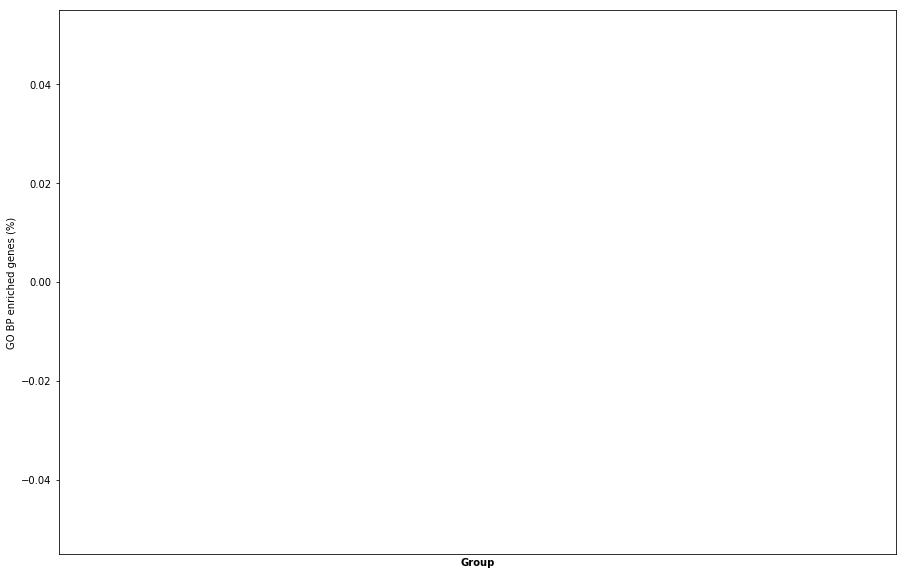

In [33]:
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.06

#bars = [adaptivelasso, lasso, aracnea, arecnem, c3net, clr, genenet, genie3, mrnetb, mrnet, wgcna, integrated]


# Set position of bar on X axis
r1 = np.arange(len(bars[0]))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6= [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]
r8 = [x + barWidth for x in r7]
r9 = [x + barWidth for x in r8]
#r10 = [x + barWidth for x in r9]
#r11 = [x + barWidth for x in r10]
#r12 = [x + barWidth for x in r11]

where = [r1, r2, r3, r4, r5, r6,r7, r8,r9]#,r10,r11,r12]
plt.figure(figsize=(15,10))
colors = ['rosybrown', 'sandybrown', 'olivedrab', 'lightseagreen', 'navy', 'mediumpurple', 'mediumvioletred', 
          'slategray', 'khaki', 'yellow', 'teal', 'r']
for i in range(8):
    # Make the plot
    plt.bar(where[i], np.array(bars1[i])*100, color=colors[i], width=barWidth, edgecolor='white', label=network_type[i])
 
plt.xlabel('Group', fontweight='bold')
plt.xticks([r + 5*barWidth for r in range(len(bars1[0]))], groups)
plt.ylabel('GO BP enriched genes (%)')
# Create legend & Show graphic
plt.legend()
plt.savefig("/Users/veronica/Dropbox (DIBRIS)/project_ucl/results_enrichment_go.png", dpi=300, transparent=True)
plt.show()


In [56]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams.update({'font.size': 22})

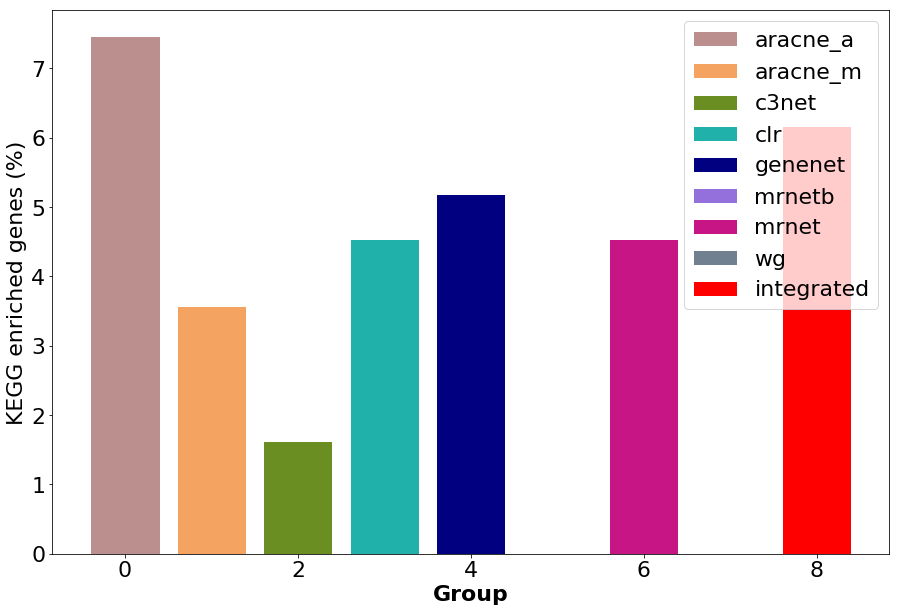

In [66]:
# set width of bar
barWidth = 0.06

plt.figure(figsize=(15,10))
colors = ['rosybrown', 'sandybrown', 'olivedrab', 'lightseagreen', 'navy', 'mediumpurple', 'mediumvioletred', 
          'slategray', 'r',]
#for i in range(9):
for i in np.arange(0,9):
    plt.bar(i, np.array(bars1[i])*100, color=colors[i], edgecolor='white', label=network_type[i])
 
plt.xlabel('Group', fontweight='bold')
#plt.xticks([r + 5*barWidth for r in range(len(bars1[0]))], groups)
plt.ylabel('KEGG enriched genes (%)')
# Create legend & Show graphic
plt.legend()
plt.savefig("/Users/veronica/Dropbox (DIBRIS)/project_ucl/results_enrichment_kegg_big_genes.png", dpi=300, transparent=True)
plt.show()

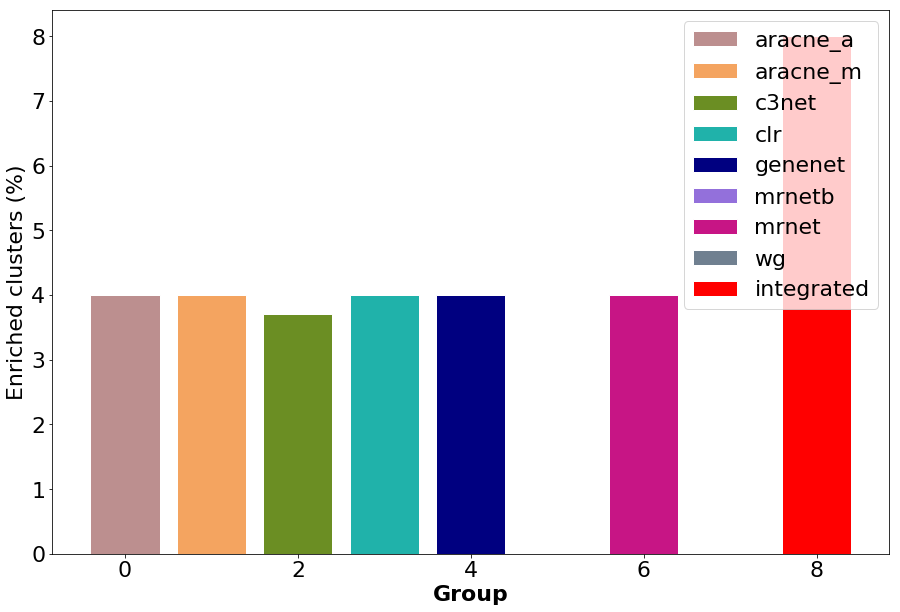

In [67]:
barWidth = 0.06

plt.figure(figsize=(15,10))
colors = ['rosybrown', 'sandybrown', 'olivedrab', 'lightseagreen', 'navy', 'mediumpurple', 'mediumvioletred', 
          'slategray', 'r',]
#for i in range(9):
for i in np.arange(0,9):
    plt.bar(i, np.array(bars2[i])*100, color=colors[i], edgecolor='white', label=network_type[i])
 
plt.xlabel('Group', fontweight='bold')
#plt.xticks([r + 5*barWidth for r in range(len(bars1[0]))], groups)
plt.ylabel('Enriched clusters (%)')
# Create legend & Show graphic
plt.legend()
plt.savefig("/Users/veronica/Dropbox (DIBRIS)/project_ucl/results_enrichment_go_kegg_clust.png", dpi=300, transparent=True)
plt.show()